# Global Power Plant Database

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
622,IND,India,RAGHUNATHPUR TPP PH-I,IND0000355,1200.0,23.6220,86.6610,Coal,Oil,NaN,...,2019.0,NaN,11.47245,240.7999,1831.84000,2103.82390,2990.0335,NaN,Central Electricity Authority,NaN
155,IND,India,Chhadavada Wind Farm,WRI1026672,21.0,23.2443,70.4603,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,IND,India,Ananthapur - Meil Solar Power Plant,WRI1026105,50.0,14.9455,77.6870,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,IND,India,KHODRI,IND0000197,120.0,30.5085,77.8001,Hydro,NaN,NaN,...,2019.0,NaN,404.95505,374.0603,331.62355,353.97125,367.8316,NaN,Central Electricity Authority,NaN
323,IND,India,KARBI LANGPI,IND0000181,100.0,25.9552,92.5171,Hydro,NaN,NaN,...,2019.0,NaN,400.41785,406.8356,394.60705,482.55510,370.8564,NaN,Central Electricity Authority,NaN


# EDA (Exploratory Data Analysis)

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [10]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:
df.isnull().sum().sum()

10445

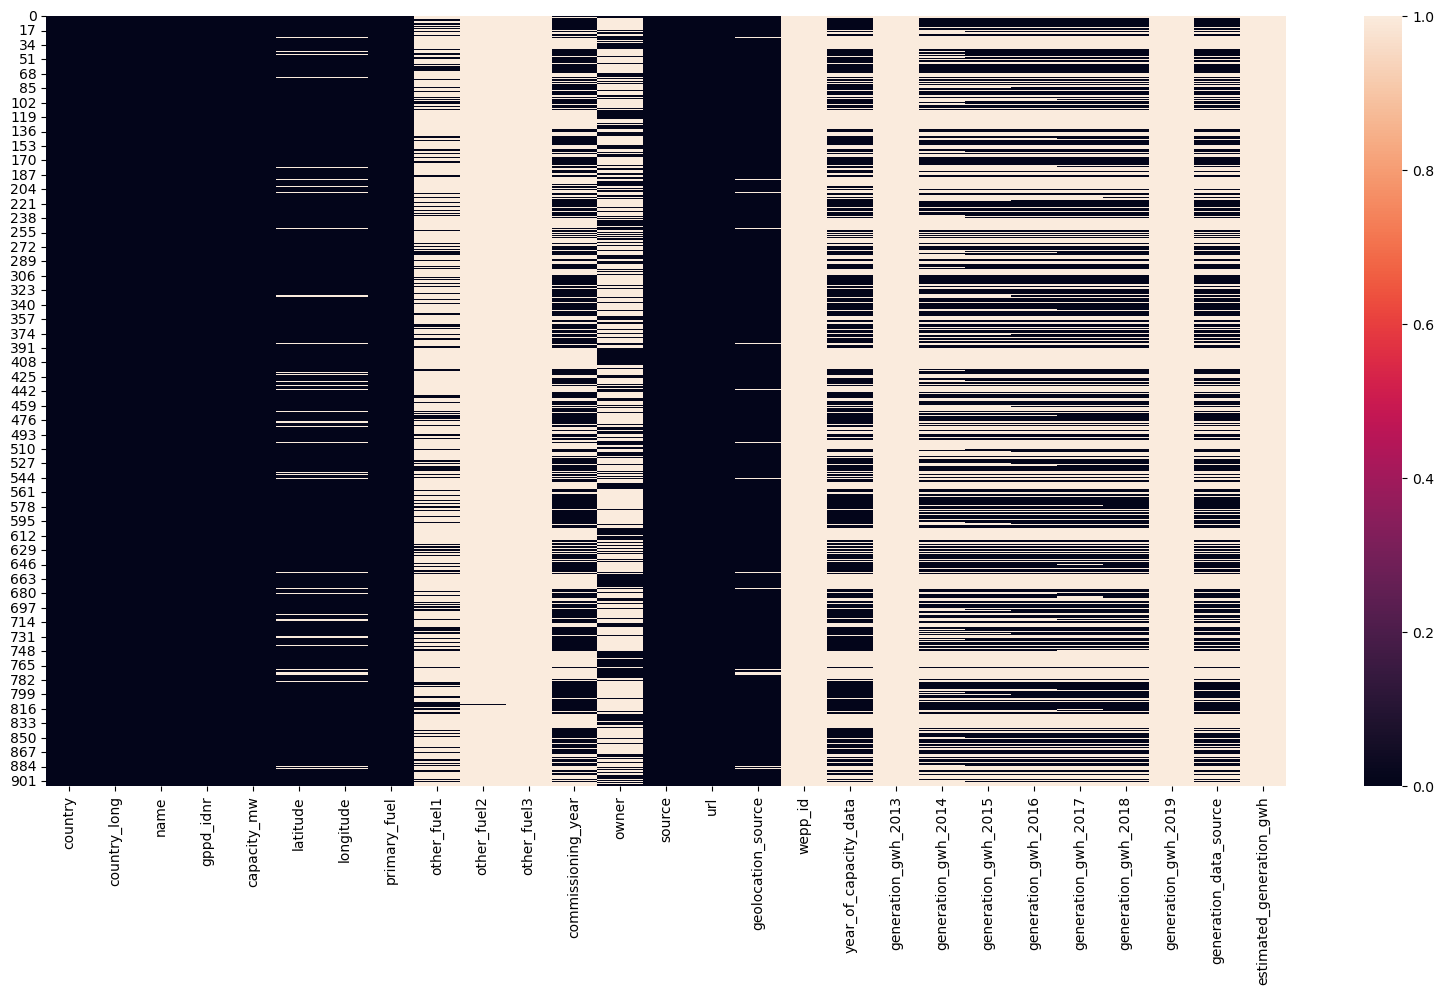

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

Now There we can see this there are lots of null value present in the Dataset lets settel down the null values 

we are going to remove some columns those having maximum no of null values because if we fill those values prediction will not correct

In [13]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','gppd_idnr','owner','generation_data_source','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

also dropping name column there no use of it

In [14]:
df.drop(['name','url','year_of_capacity_data'],axis=1,inplace=True)

also dropping columns 'country' and 'country_long' because having one country name only, it will not help for any prediction

In [15]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [17]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [18]:
df.head(20)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.50,28.1839,73.2407,6,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,98.00,24.7663,74.6090,1,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,39.20,21.9038,69.3732,7,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,135.00,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.00,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
5,250.00,23.7689,68.6447,1,2005.0,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000
6,60.00,10.4547,77.0078,3,1970.0,22,2,157.558250,152.195200,61.421350,89.629600,48.327150
7,192.00,32.2258,77.2070,3,2010.0,22,2,674.391100,721.335200,675.724400,679.594950,579.318850
8,290.00,16.3300,75.8863,3,2004.0,22,2,480.594950,144.434200,402.029750,439.372100,406.377900
9,210.00,23.1642,81.6373,1,2008.0,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000


Now We can check the null value present in the dataset or not lets check with the Heatmap again 


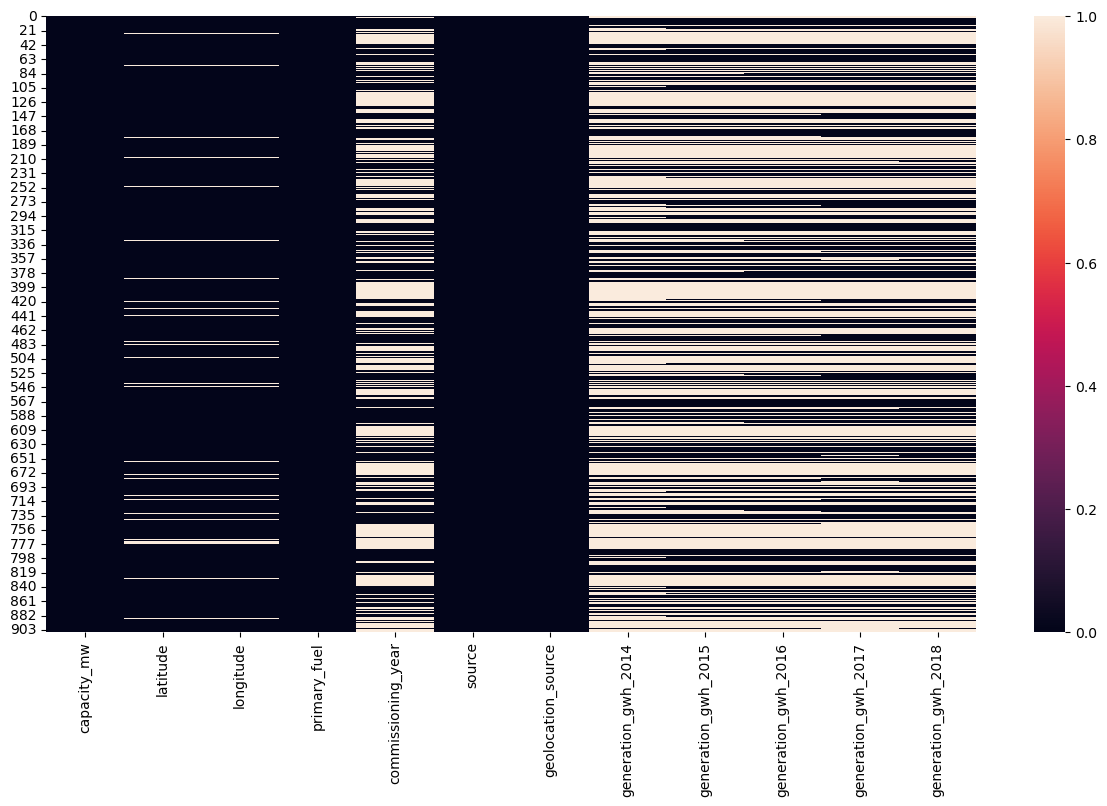

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

In [20]:
df.replace(np.nan,0, inplace = True)
df.head(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,0.000000,0.0000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,0.0,174,2,0.000000,0.0000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,0.0,21,2,0.000000,0.0000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.7470,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,1,2005.0,22,2,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,60.0,10.4547,77.0078,3,1970.0,22,2,157.558250,152.1952,61.421350,89.629600,48.327150
7,192.0,32.2258,77.2070,3,2010.0,22,2,674.391100,721.3352,675.724400,679.594950,579.318850
8,290.0,16.3300,75.8863,3,2004.0,22,2,480.594950,144.4342,402.029750,439.372100,406.377900
9,210.0,23.1642,81.6373,1,2008.0,22,2,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000


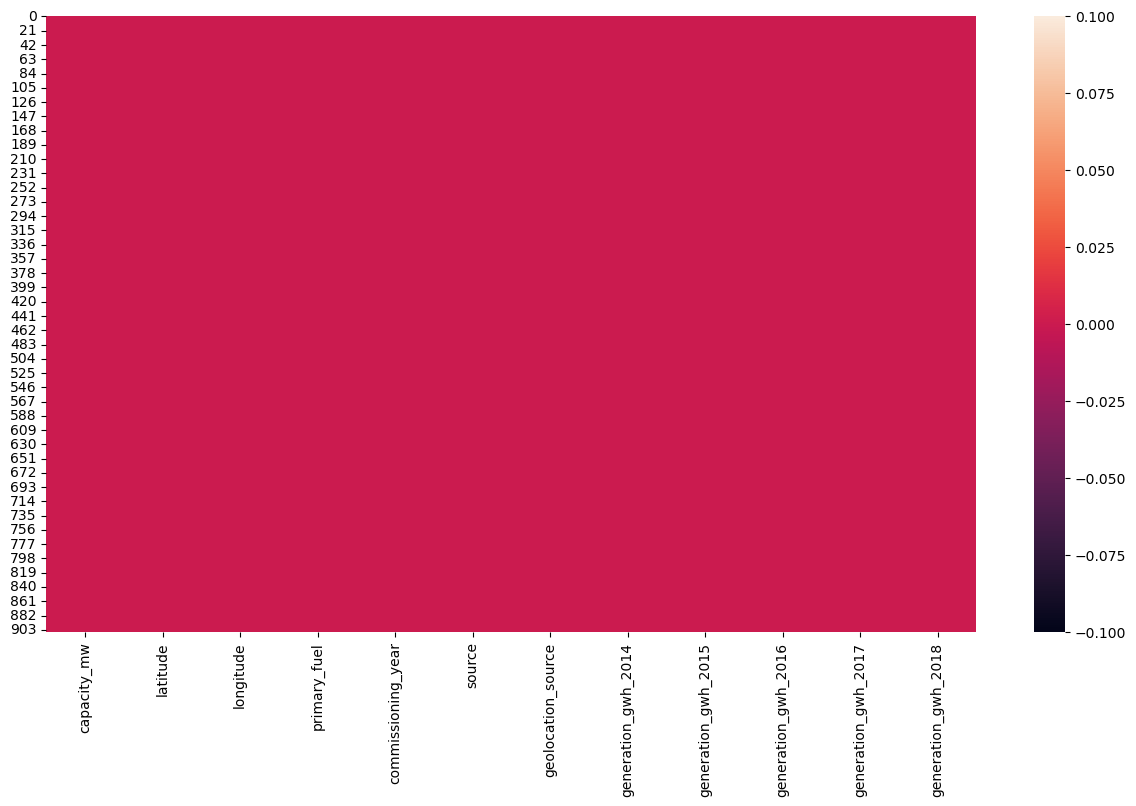

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

Now we can check there is null value present in the Dataset we have setteled the null values

In [22]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,20.122831,73.536147,3.206174,1160.382580,43.847850,1.754135,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,7.655960,17.674358,2.280652,985.973139,44.642818,0.700183,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.172050,73.811550,1.000000,0.000000,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,3.000000,1978.000000,22.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,2.000000,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [23]:
df.skew()

capacity_mw            3.123576
latitude              -0.730074
longitude             -3.581827
primary_fuel           0.472251
commissioning_year    -0.328505
source                 1.827373
geolocation_source    -1.920302
generation_gwh_2014    4.986588
generation_gwh_2015    5.260778
generation_gwh_2016    4.984874
generation_gwh_2017    4.979870
generation_gwh_2018    4.846091
dtype: float64

# Data Visualization

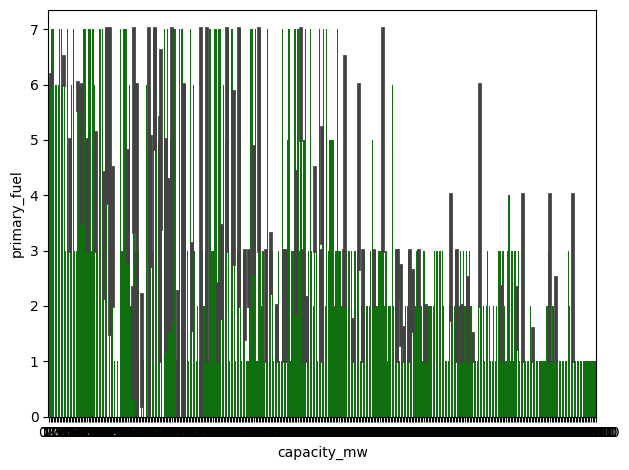

In [24]:
sns.barplot(y="primary_fuel", x="capacity_mw", data=df, color="green")
plt.tight_layout()
plt.show()

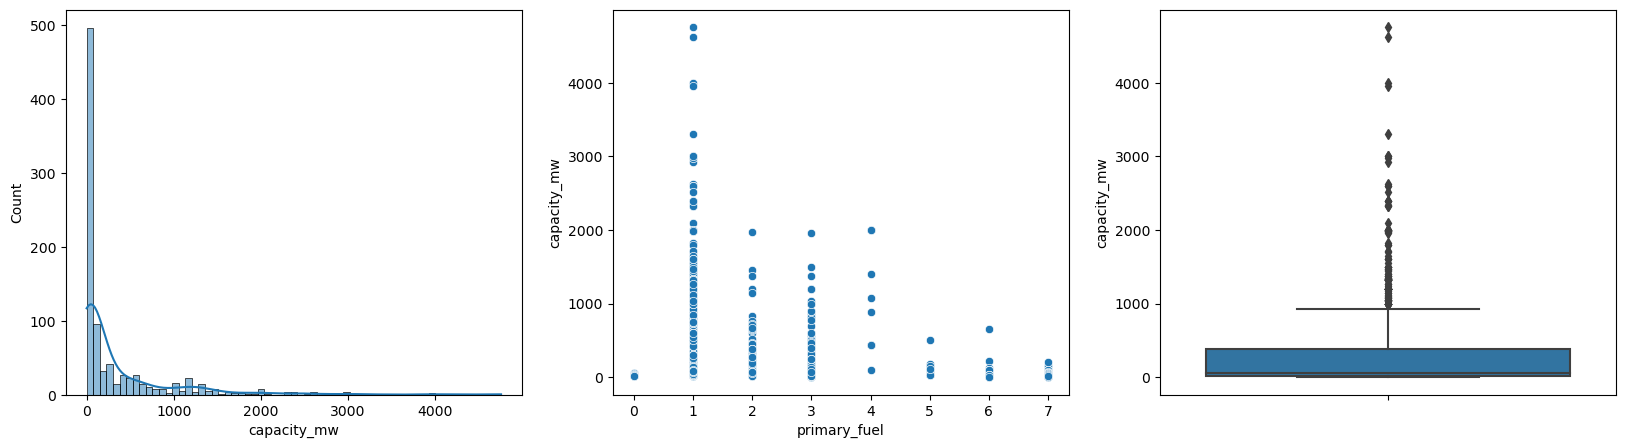

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='capacity_mw',data=df,kde=True)
plt.subplot(1,3,2)
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='capacity_mw',data=df) 
plt.show()

In [26]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

1    28.445424
3    27.673649
6    14.002205
7    13.561191
2     7.607497
0     5.512679
5     2.205072
4     0.992282
Name: primary_fuel, dtype: float64

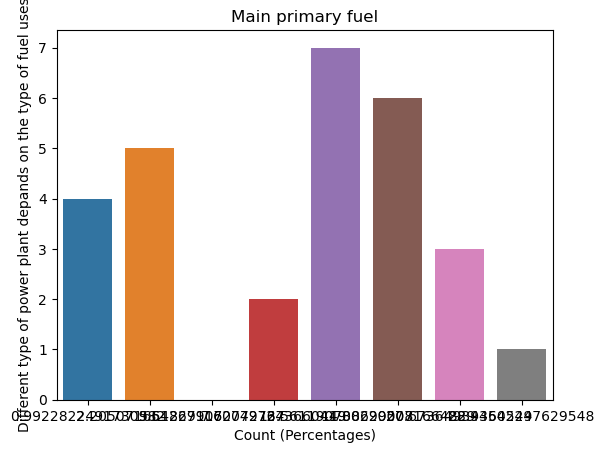

In [27]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

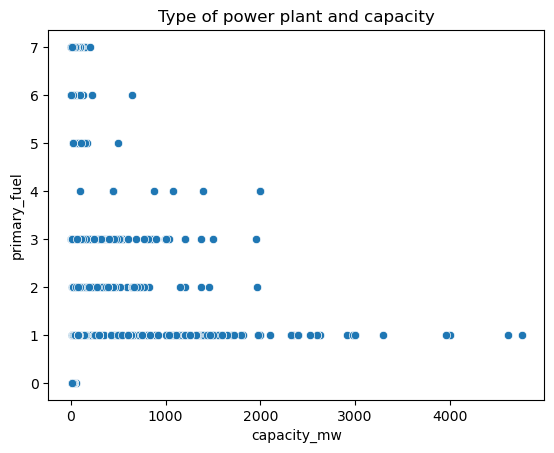

In [28]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel )
plt.title('Type of power plant and capacity');

we can notice that there is no electricity generation in gigawatt-hour in 2013

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

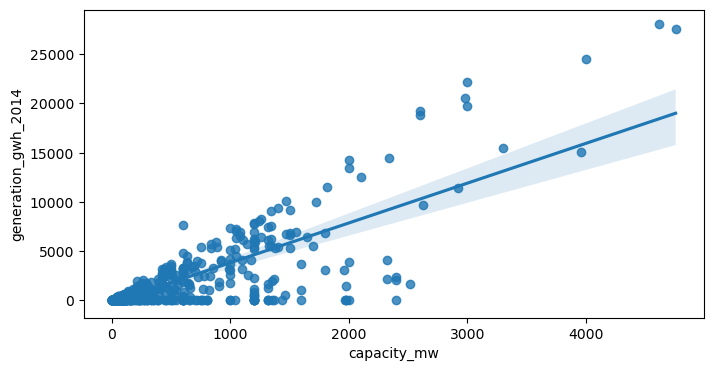

In [29]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='generation_gwh_2014',data=df)

In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

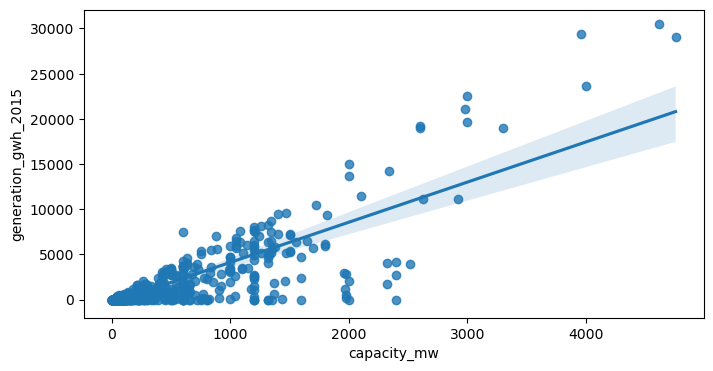

In [30]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='generation_gwh_2015',data=df)

In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

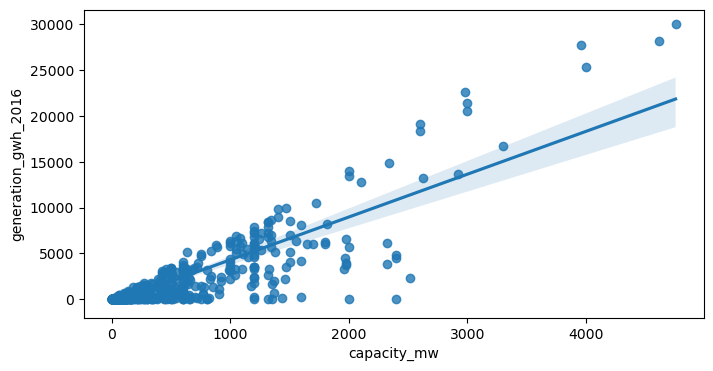

In [31]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='generation_gwh_2016',data=df)

In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016



<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

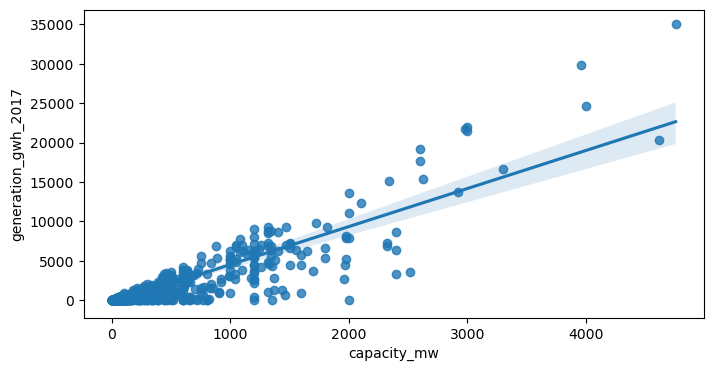

In [32]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='generation_gwh_2017',data=df)

In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

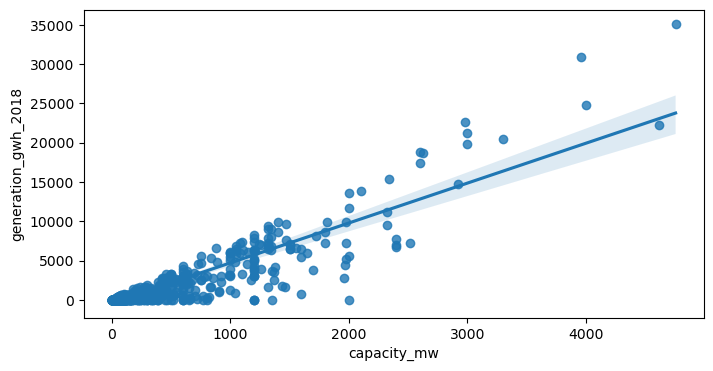

In [33]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='generation_gwh_2018',data=df)

In 2018 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2018

we can notice that there is no electricity generation in gigawatt-hour in 2019

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

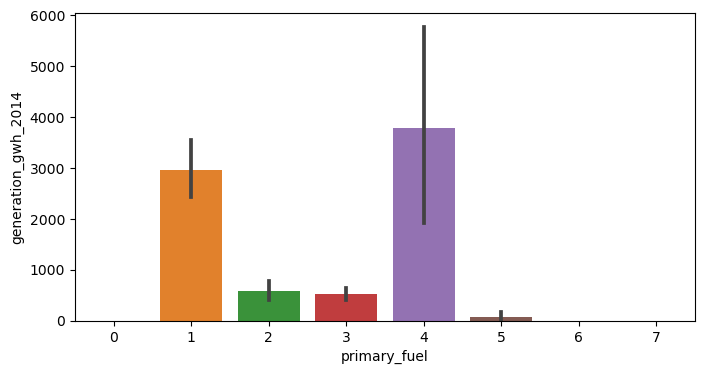

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

We can see this Nuclear and Coal is most used fuel in 2014 gas and hydro are less used in 2014

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

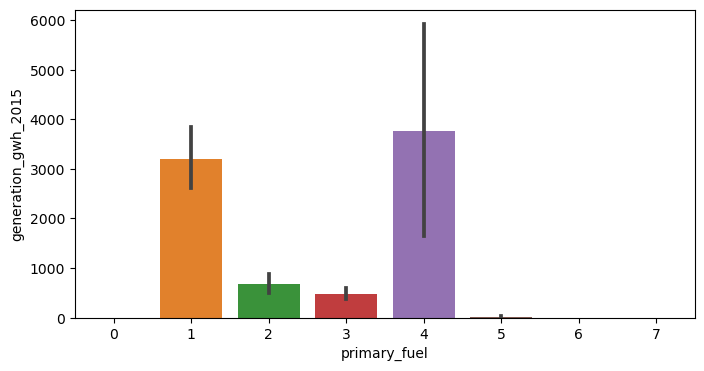

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

We can see this Nuclear and Coal is most used fuel in 2015 gas and hydro are less used in 2015

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

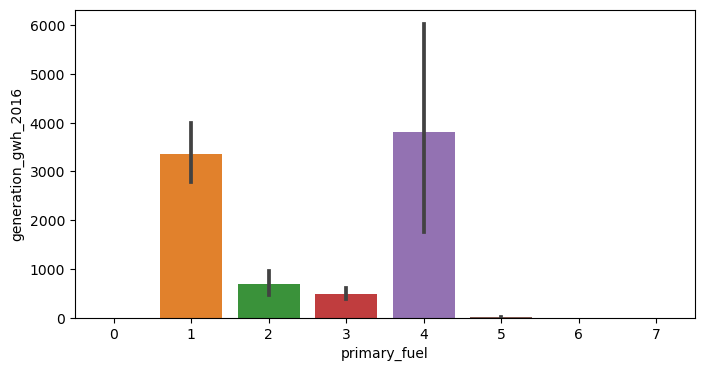

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)

We can see this Nuclear and Coal is most used fuel in 2016 gas and hydro are less used in 2016

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

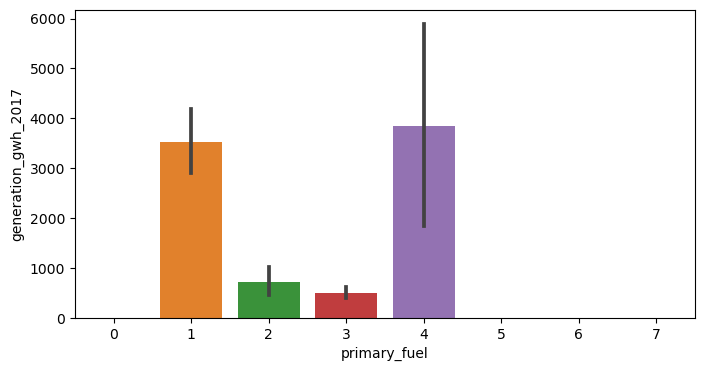

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)

We can see this Nuclear and Coal is most used fuel in 2017 gas and hydro are less used in 2017

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

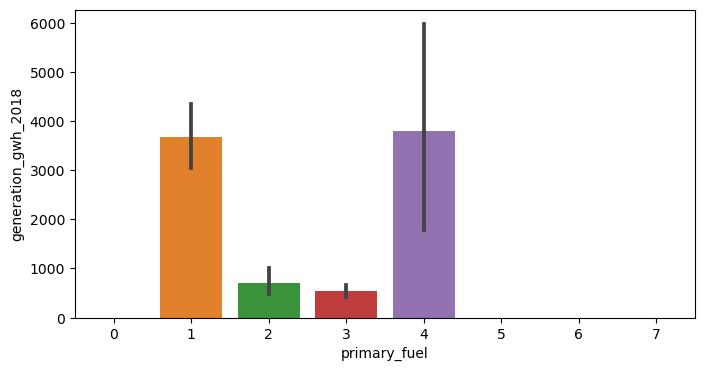

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)

We can see this Nuclear and Coal is most used fuel in 2018 gas and hydro are less used in 2018

# Correlation Matrix

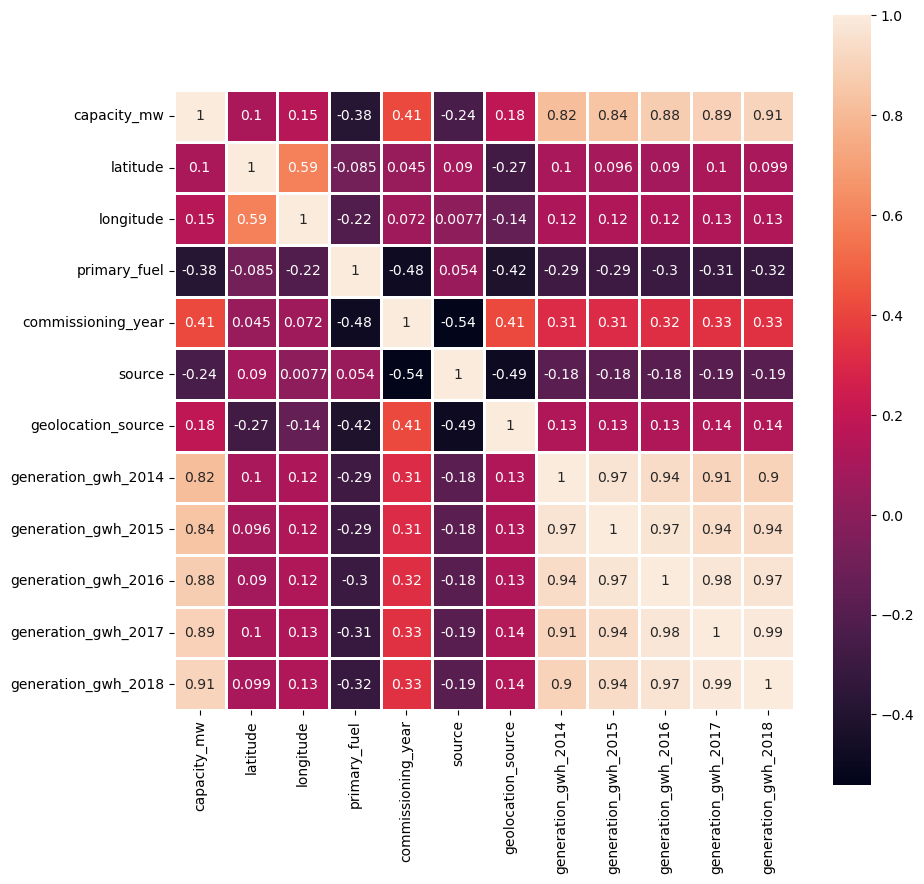

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, square=True, linewidth=1)
plt.show()

Here we can see this generation_gwh_2014,....2015,...2016 ,...2017,....2018 are positively correlated to capacity_mw

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


# Removing the Outliers 

In [41]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))


(array([ 14,  15,  15,  15,  15,  15,  25,  42,  45,  67,  71,  72,  80,
       143, 143, 143, 143, 143, 143, 147, 158, 178, 191, 192, 201, 208,
       209, 209, 209, 209, 209, 209, 250, 299, 308, 308, 308, 308, 308,
       308, 321, 329, 330, 332, 345, 363, 364, 364, 364, 364, 364, 364,
       375, 386, 420, 422, 430, 435, 440, 466, 478, 479, 482, 482, 483,
       493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 502,
       532, 538, 540, 545, 623, 648, 648, 648, 648, 648, 648, 655, 657,
       657, 657, 657, 657, 657, 661, 669, 674, 680, 689, 695, 695, 695,
       695, 695, 695, 705, 711, 712, 721, 721, 721, 721, 721, 724, 724,
       724, 724, 724, 726, 726, 726, 726, 726, 726, 731, 732, 741, 767,
       770, 773, 774, 775, 776, 784, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 828, 832, 870, 871, 879, 880, 880,
       880, 880, 880, 880, 884, 886, 895, 900], dtype=int64), array([ 2,  0,  8,  9, 10, 11,  2,  2,  2,  2,  5,  2,  5,  0,  7,  8,  9

In [49]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df = df1.copy()

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (846, 12)
Percentage of data loss post outlier removal:  6.725468577728775


In [50]:
df.shape

(846, 12)

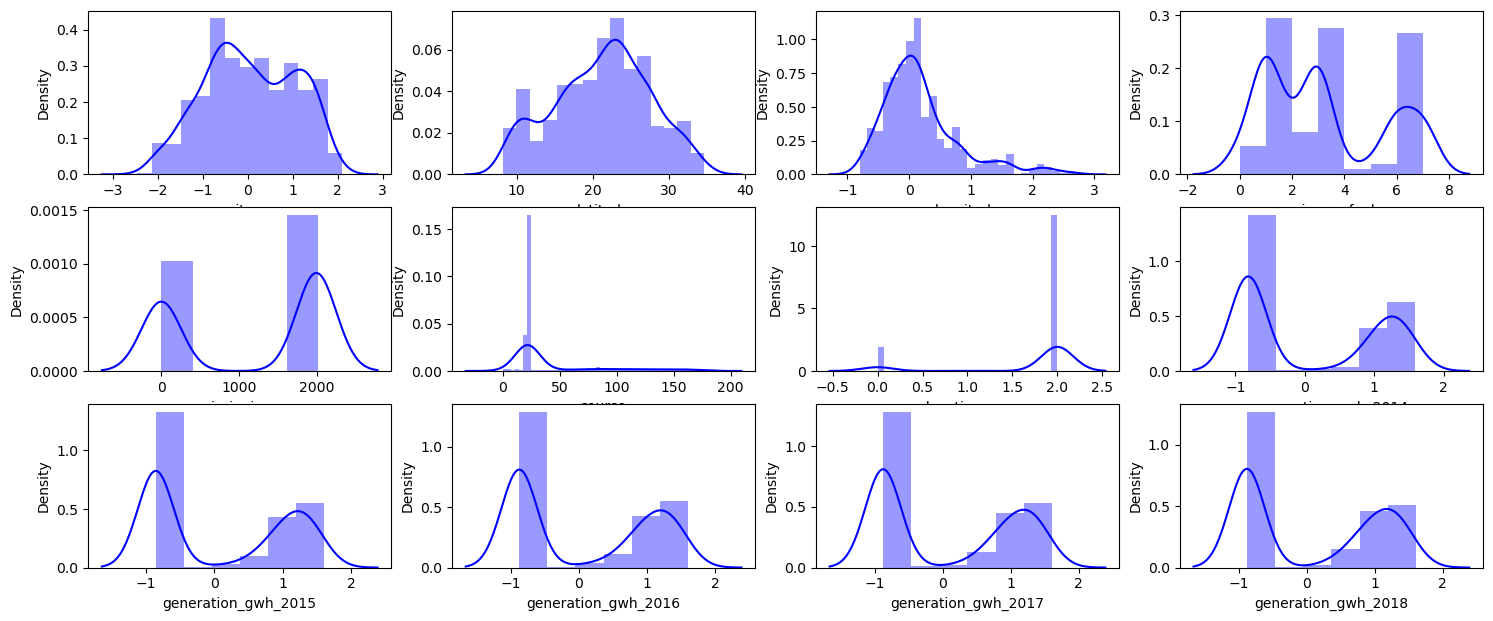

In [51]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [52]:
df.skew()

capacity_mw           -0.045029
latitude              -0.147530
longitude              1.425933
primary_fuel           0.513106
commissioning_year    -0.350508
source                 1.837300
geolocation_source    -2.113647
generation_gwh_2014    0.351614
generation_gwh_2015    0.281794
generation_gwh_2016    0.249849
generation_gwh_2017    0.243066
generation_gwh_2018    0.223638
dtype: float64

In [53]:
from sklearn.preprocessing import power_transform

df[['capacity_mw','longitude',"generation_gwh_2018",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw','longitude',"generation_gwh_2018",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])


In [54]:
df.skew()

capacity_mw           -0.034843
latitude              -0.147530
longitude             -0.001185
primary_fuel           0.513106
commissioning_year    -0.350508
source                 1.837300
geolocation_source    -2.113647
generation_gwh_2014    0.307612
generation_gwh_2015    0.228443
generation_gwh_2016    0.196350
generation_gwh_2017    0.192562
generation_gwh_2018    0.176178
dtype: float64

In [55]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

# First taking 'capacity_mw' as target creating Regression model
Dividing data into X and Y

In [56]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [57]:
x.shape

(846, 11)

In [58]:
y.shape

(846,)

# scaling X values

In [59]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [60]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [61]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,0.491858,0.510212,0.450355,0.580191,0.238190,0.862884,0.390807,0.397947,0.399754,0.398868,0.399395
std,0.236666,0.197097,0.322835,0.487706,0.235745,0.342450,0.450796,0.437502,0.431437,0.429527,0.427146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324235,0.388791,0.142857,0.000000,0.124294,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.514662,0.515759,0.428571,0.980674,0.124294,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.655114,0.625341,0.857143,0.992567,0.145480,1.000000,0.904898,0.876090,0.862869,0.860197,0.854717
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Building 

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [63]:
LR=LinearRegression()

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6960021094672647
At random state 0, The test accuracy is: 0.6241930114177752


At random state 1, The training accuracy is: 0.6736927821239947
At random state 1, The test accuracy is: 0.7207770340266054


At random state 2, The training accuracy is: 0.6959743179827387
At random state 2, The test accuracy is: 0.6116011548283706


At random state 3, The training accuracy is: 0.6827718694928525
At random state 3, The test accuracy is: 0.6812068817667825


At random state 4, The training accuracy is: 0.6893846525255573
At random state 4, The test accuracy is: 0.6430691929862153


At random state 5, The training accuracy is: 0.6714458059981274
At random state 5, The test accuracy is: 0.7283331379670883


At random state 6, The training accuracy is: 0.6687510904601078
At random state 6, The test accuracy is: 0.7383187755851509


At random state 7, The training accuracy is: 0.6948872256609078
At random state 7, The test accuracy is: 0.62705517495

At random state 73, The training accuracy is: 0.682777438032675
At random state 73, The test accuracy is: 0.6747730461637107


At random state 74, The training accuracy is: 0.6767448143054974
At random state 74, The test accuracy is: 0.7066370439849337


At random state 75, The training accuracy is: 0.6881059143961544
At random state 75, The test accuracy is: 0.6555063768851543


At random state 76, The training accuracy is: 0.6763492317001667
At random state 76, The test accuracy is: 0.7106572924741894


At random state 77, The training accuracy is: 0.6789356009103359
At random state 77, The test accuracy is: 0.6869962237996232


At random state 78, The training accuracy is: 0.7064584184939107
At random state 78, The test accuracy is: 0.557880362805188


At random state 79, The training accuracy is: 0.6773929503570777
At random state 79, The test accuracy is: 0.7030169481278887


At random state 80, The training accuracy is: 0.673971760858266
At random state 80, The test accuracy is: 

At random state 147, The training accuracy is: 0.68928218302554
At random state 147, The test accuracy is: 0.6522781483182541


At random state 148, The training accuracy is: 0.6926693515611015
At random state 148, The test accuracy is: 0.6381913850455334


At random state 149, The training accuracy is: 0.6994568308340626
At random state 149, The test accuracy is: 0.6126274981963106


At random state 150, The training accuracy is: 0.6832787181985571
At random state 150, The test accuracy is: 0.6764058943117857


At random state 151, The training accuracy is: 0.6868815280381533
At random state 151, The test accuracy is: 0.6581185108055986


At random state 152, The training accuracy is: 0.6670632680701876
At random state 152, The test accuracy is: 0.7331648338132556


At random state 153, The training accuracy is: 0.6922860347892372
At random state 153, The test accuracy is: 0.6389380673886964


At random state 154, The training accuracy is: 0.6818457967522529
At random state 154, The t

SPLITTING THE DATA WITH RANDOM STATE =193

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=193)

In [65]:
x_train.shape

(617, 11)

In [66]:
x_test.shape

(229, 11)

In [67]:
y_train.shape

(617,)

In [68]:
y_test.shape

(229,)

In [69]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7080571627960766


In [70]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.3762370759526311
MAE: 0.47659206703672385
r2_score: 0.45966797180963204


# Ridge

In [71]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.7078942232145105


In [72]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3750271437447663
MAE: 0.4768544788537937
r2_score: 0.45600531967096414


# SVR

In [73]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)


0.6959569071688421


In [74]:

print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.39126036092335126
MAE: 0.46717179666117176
r2_score: 0.5270585771735946


(kernel='rbf')

In [75]:

svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)


0.8222975549111478


In [76]:

print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.2637820133615561
MAE: 0.34608930381846986
r2_score: 0.669058998453034


# RandomForestRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)


0.9762317593760823


In [78]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.21996999679513604
MAE: 0.30027453992415315
r2_score: 0.7364936949546836


# DecisionTreeRegressor


In [79]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [80]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.3251532830760772
MAE: 0.3685774966518478
r2_score: 0.6510031606302771


# GradientBoostingRegressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9076625987156344


In [82]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.2159586537393043
MAE: 0.30600866767566526
r2_score: 0.72311689098427


# cross validation

In [83]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))


LR    : 0.330798, 0.042538
R    : 0.328968, 0.042315
svr    : 0.348100, 0.042230
svr_r    : 0.228781, 0.054130
RF    : 0.230140, 0.053745
DTR    : 0.197249, 0.060668
GBR    : 0.316209, 0.066772


# GridSearchCV


In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }





In [86]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [87]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [88]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [89]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.2203500383340578
MAE: 0.30211697412007904
r2_score: 0.7360224842070464


<Axes: xlabel='capacity_mw', ylabel='Density'>

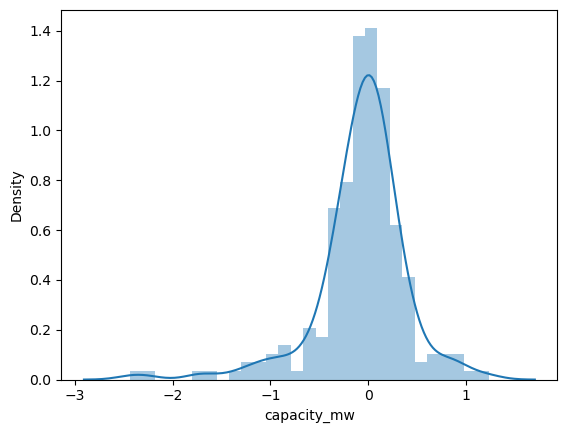

In [90]:
sns.distplot(GF_grid_pred-y_test)

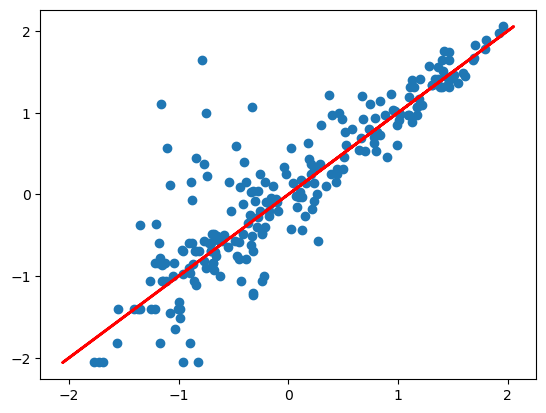

In [91]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Choosing GradientBoostingRegressor as the best model
saving the model

In [92]:
import joblib
joblib.dump(GF_grid.best_estimator_,'Global Power Plant.obj')


['Global Power Plant.obj']

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL
Dividing data into X and Y

In [93]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']


In [94]:
x.shape

(846, 11)

In [95]:
y.shape

(846,)

# Spliting Train and Test data

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)


In [97]:
x_train.shape

(617, 11)

In [98]:
x_test.shape

(229, 11)

In [99]:
y_train.shape

(617,)

In [100]:
y_test.shape

(229,)

In [101]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LogisticRegression

In [102]:

logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))




cross validation score: 0.47170205360250606


In [103]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)


print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.5327510917030568
[[ 1  0  0  0  0  0  6  1]
 [ 0  0  0 48  0  0 14  4]
 [ 0  0  0 16  0  0  1  0]
 [ 0  4  0 73  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  2  1]
 [ 0  0  0  0  0  0 25  2]
 [ 0  0  0  0  0  0  2 23]]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        17
           3       0.51      0.95      0.66        77
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.50      0.93      0.65        27
           7       0.74      0.92      0.82        25

    accuracy                           0.53       229
   macro avg       0.34      0.36      0.29       229
weighted avg       0.35      0.53      0.40       229

Training accuracy:: 0.46677471636953
Test accuracy:: 0.5327510917030568


# DECISION TREE CLASSIFIER

In [104]:

dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))


cross validation score for svm: 0.8132753219631048


In [105]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7510917030567685
[[ 3  5  0  0  0  0  0  0]
 [ 4 47  7  8  0  0  0  0]
 [ 0  6  7  3  0  1  0  0]
 [ 0  4  5 62  0  6  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  3  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.72      0.71      0.72        66
           2       0.33      0.41      0.37        17
           3       0.82      0.81      0.81        77
           4       0.00      0.00      0.00         2
           5       0.12      0.14      0.13         7
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        25

    accuracy                           0.75       229
   macro avg       0.55      0.56      0.55       229
weighted avg       0.75      0.75      0.75       229

Training accuracy:: 1.0
Test accuracy:: 0.7510917030567685


# KNeighborsClassifier

In [106]:

knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.6524956491472329


In [107]:

knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.62882096069869
[[ 5  2  0  0  0  0  1  0]
 [ 2 42  3 10  0  0  7  2]
 [ 0  9  1  6  0  0  1  0]
 [ 0 20  2 55  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  3  2  2  0  0  0  0]
 [ 3  6  1  0  0  0 16  1]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.51      0.64      0.57        66
           2       0.10      0.06      0.07        17
           3       0.74      0.71      0.73        77
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           6       0.64      0.59      0.62        27
           7       0.89      1.00      0.94        25

    accuracy                           0.63       229
   macro avg       0.42      0.45      0.44       229
weighted avg       0.60      0.63      0.61       229

Training accuracy:: 0.8022690437601296
Test accuracy:: 0.62882096069869


# RandomForestClassifier

In [108]:

rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.852238078663418


In [109]:

rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.851528384279476
[[ 6  2  0  0  0  0  0  0]
 [ 4 56  3  2  0  0  0  1]
 [ 0  4  4  8  0  1  0  0]
 [ 0  0  1 76  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  2  3  0  1  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.86      0.85      0.85        66
           2       0.40      0.24      0.30        17
           3       0.85      0.99      0.92        77
           4       0.00      0.00      0.00         2
           5       0.50      0.14      0.22         7
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        25

    accuracy                           0.85       229
   macro avg       0.65      0.62      0.62       229
weighted avg       0.82      0.85      0.83       229

Training accuracy:: 1.0
Test accuracy:: 0.851528384279476


# HYPER PARAMETER TUNING:

In [110]:

rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}


In [111]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [112]:

rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.834061135371179


In [113]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

model training with best parameters

In [114]:

best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }



In [115]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [116]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.834061135371179


# Report of RandomForestClassifier

In [117]:

print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.84      0.82      0.83        66
           2       0.31      0.24      0.27        17
           3       0.86      0.96      0.91        77
           4       0.00      0.00      0.00         2
           5       0.50      0.14      0.22         7
           6       1.00      1.00      1.00        27
           7       0.96      1.00      0.98        25

    accuracy                           0.83       229
   macro avg       0.63      0.61      0.60       229
weighted avg       0.81      0.83      0.82       229



<Axes: >

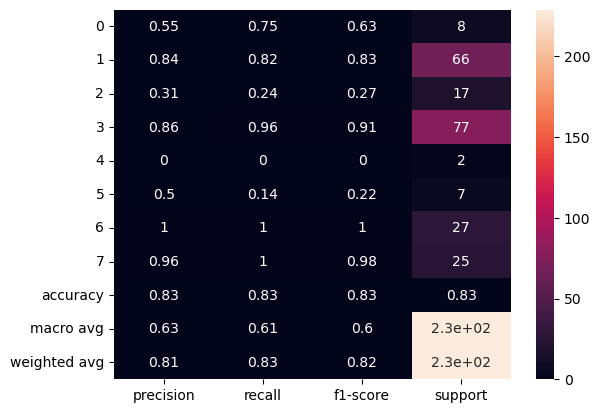

In [118]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [119]:
from sklearn.metrics import roc_auc_score
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.953902 (macro),
0.957822 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.965435 (macro),
0.974882 (weighted by prevalence)


# Saving Model:

In [120]:

import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant primery_fuel.obj')

['Global Power Plant primery_fuel.obj']